# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import requests
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
weather_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [9]:

# List for holding latitude, longtitude and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and long combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for the random combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))
print(len(countries))


638
638


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# set lists for the dataframe so that we can hold the data 
city_two = []
cloudy = []
dates = []
humidities = []
lats = []
lngs = []
max_temp = []
windspd= []
countries = []

# set initial count quantities 
count_one = 0
set_one = 1

# loops for creating dataframe columns we do exceptions because there may be missing points and so our code will know to skip what cannot be processed
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudy.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        windspd.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")

Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | merrill
Processing Record 6 of Set 1 | mogadishu
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | luderitz
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | benidorm
Processing Record 13 of Set 1 | miraflores
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | dicabisagan
Processing Record 17 of Set 1 | ilulissat
City not found. Skipping...
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | comodoro rivadavia
Processing Record 21 of Set 1 | severo-kurilsk
Processing Record 22 of Set 1 | cidreira
Processing Record 23 of Set 1 | ambilobe
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
# simplest way to create a dataframe is first ot create a dictionary with the variables that we are concerned with from the previous us block 

weather_dict = {
    "City":city_two,
    "Cloudiness":cloudy,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temp,
    "Wind Speed":windspd
}

# after we convert the dictionary into a pandas dataframe 

weather_dataframe = pd.DataFrame(weather_dict)

weather_dataframe
#export data frame into the csv file we loaded at the beginning

weather_dataframe.to_csv(weather_data_file)


11

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_dataframe["Humidity"].max()

#Since the max is 100 there is no cities with humidity higher than 100%

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

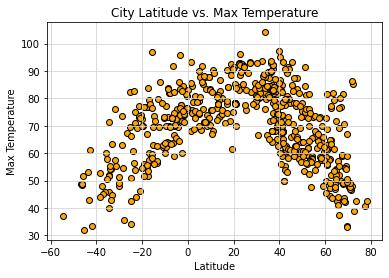

In [26]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="orange")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid (b=True)

plt.show()

# polynomial relationship 

## Latitude vs. Humidity Plot

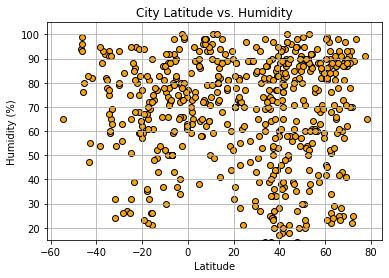

In [29]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="orange")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True)
plt.show()

# no relationship

## Latitude vs. Cloudiness Plot

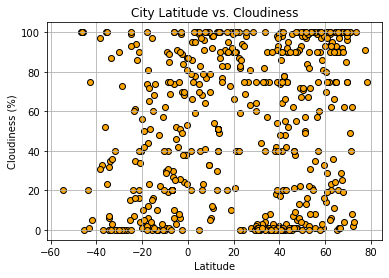

In [31]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="orange")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True)
plt.show()

# no relationship

## Latitude vs. Wind Speed Plot

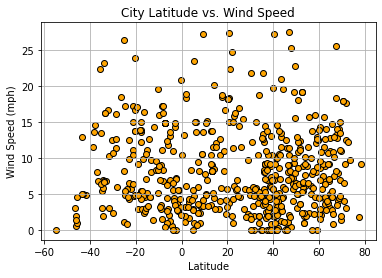

In [32]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="orange")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True)
plt.show()

# no relationship

## Linear Regression

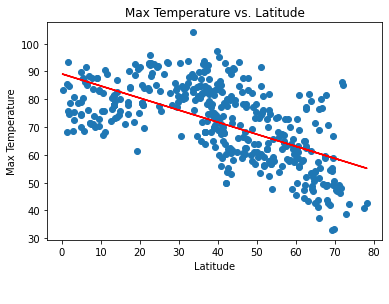

The r-squared is: 0.3807591250064379


'y = -0.43x + 89.12'

In [51]:
# Separate out northern and souther hemisphere 

northern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"] >= 0]
northern_cities_count = len(northern_hemisphere)
southern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"] < 0]
southern_cities_count = len(southern_hemisphere)

# northern hempishere max temp v latitude regression 

x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Max Temperature vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

print(f"The r-squared is: {rvalue**2}")
line_eq 

# The slope of the equation and R square shows there is a negative relationship between temperature and latitude and our model can explain 38% of the data 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

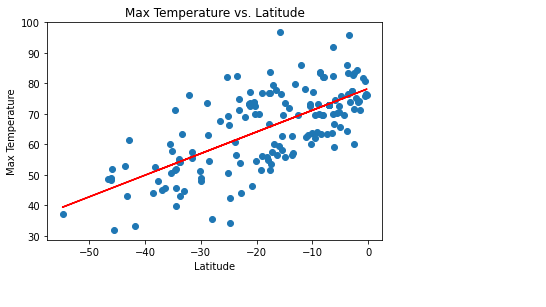

The r-squared is: 0.4723929314101778


'y = 0.71x + 78.28'

In [52]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Max Temperature vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

print(f"The r-squared is: {rvalue**2}")
line_eq 

# The slope of the equation and R square shows there is a positive relationship between temperature and latitude and our model can explain 47% of the data 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

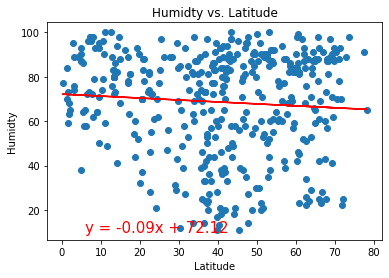

The r-squared is: 0.005504543629422369


'y = -0.09x + 72.12'

In [65]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Humidty vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidty')
plt.show()

print(f"The r-squared is: {rvalue**2}")
line_eq 

# The slope of the relationship and R square shows there is no significant relationship between humidity and latitude


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

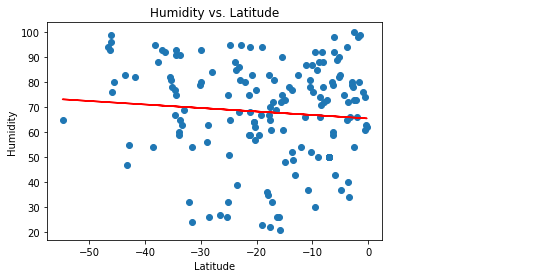

The r-squared is: 0.008160060012332406


'y = -0.14x + 65.54'

In [64]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

print(f"The r-squared is: {rvalue**2}")
line_eq 

# The slope of the relationship and R square shows there is no significant relationship between humidity and latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

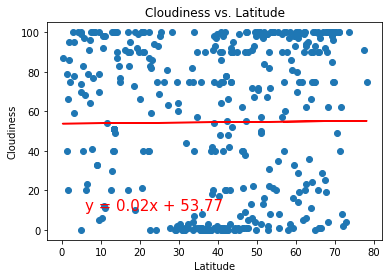

The r-squared is: 7.753090243221397e-05


'y = 0.02x + 53.77'

In [63]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

print(f"The r-squared is: {rvalue**2}")
line_eq 

# The slope of the relationship and R square shows there is no significant relationship between cloudiness and latitude

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

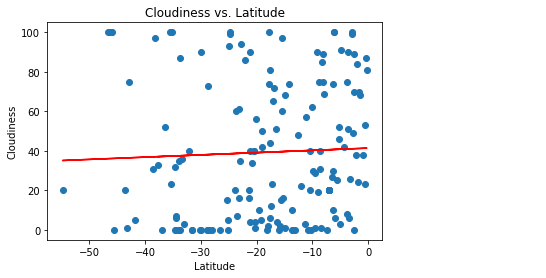

The r-squared is: 0.00178080902369562


'y = 0.11x + 41.39'

In [61]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

print(f"The r-squared is: {rvalue**2}")
line_eq 

# The slope of the relationship and R square shows there is no significant relationship between cloudiness and latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

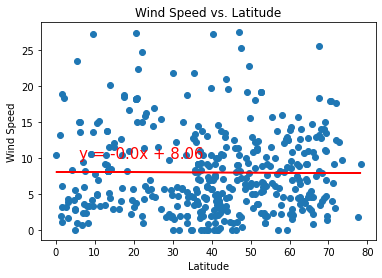

The r-squared is: 2.8756007714617157e-05


'y = -0.0x + 8.06'

In [60]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

print(f"The r-squared is: {rvalue**2}")
line_eq 
# The slope of the relationship and R square shows there is no relationship between wind speed and latitude

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

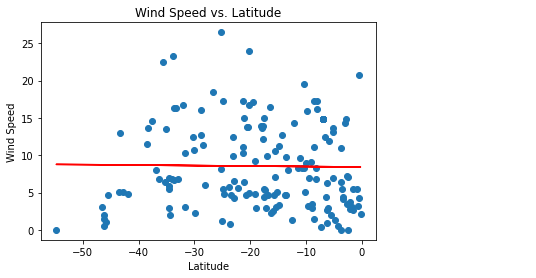

The r-squared is: 0.00020598761887341433


'y = -0.01x + 8.42'

In [58]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

print(f"The r-squared is: {rvalue**2}")
line_eq 

# The slope of the relationship and R square shows there is no relationship between wind speed and latitude